In [27]:
# ipython kernel install --user --name=venv
import pandas as pd
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [83]:
DATA_PATH = "../data/processed/final_total_total_data.csv"
TARGET_COLUMN = "TXT_FUN_TX_EVASAO_TOTAL"
COLUMNS_TO_DROP = []

In [84]:
filtered_data = pd.read_csv(DATA_PATH, delimiter=";")
trainning_df = filtered_data.drop(COLUMNS_TO_DROP, axis=1)

trainning_df.dropna(inplace=True)

X = trainning_df.drop(TARGET_COLUMN, axis=1).select_dtypes(exclude=['object']).values
normX = X / np.linalg.norm(X)

y = trainning_df[TARGET_COLUMN]
normY = y / np.linalg.norm(y)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
explainer = shap.Explainer(regressor)
shap_values = explainer(X_test)

feature_names = trainning_df.drop(TARGET_COLUMN, axis=1).columns

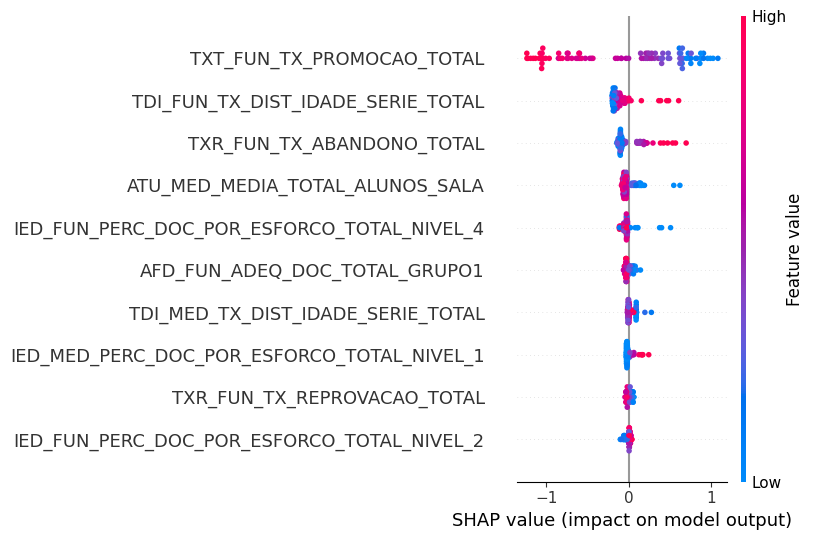

In [87]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names, max_display=10)

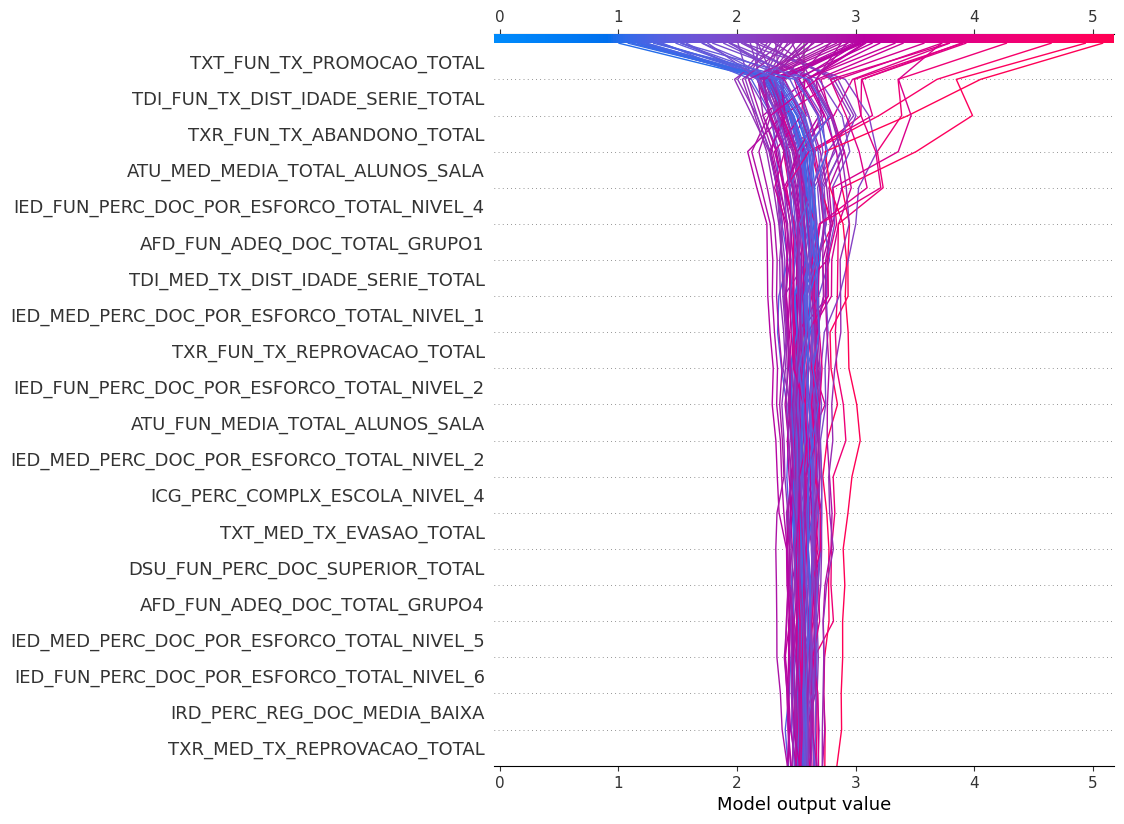

In [88]:
base_value = shap_values.base_values[0]
shap_values_array = shap_values.values
shap.plots.decision(base_value=base_value, shap_values=shap_values_array, feature_names=feature_names.tolist())